In [5]:
# 1) Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [6]:
# 2) Cargar dataset
data = pd.read_csv("C:/Users/cecil/Downloads/articulos_ml.csv")
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [8]:
# 3) Preprocesamiento (solo columnas numéricas)
# Seleccionamos solo columnas numéricas
numerical_cols = data.select_dtypes(include=np.number).columns
X = data[numerical_cols].drop("# Shares", axis=1)
y = data["# Shares"]

# Imputación de valores faltantes
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


In [9]:
# 4) División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [11]:
model_base = LinearRegression()
model_base.fit(X_train, y_train)

y_pred_base = model_base.predict(X_test)

# RMSE y R² usando np.sqrt para compatibilidad
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred_base))
print("RMSE base:", rmse_base)
print("R² base:", r2_score(y_test, y_pred_base))

RMSE base: 26118.67899140522
R² base: -0.8030792561676594


In [12]:
# 6) Optimización con GridSearchCV
param_grid = {
    "fit_intercept": [True, False],
    "copy_X": [True, False]
}

search = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=param_grid,
    cv=5,
    scoring="r2"
)

search.fit(X_train, y_train)

print("Mejores parámetros:", search.best_params_)

best_model = search.best_estimator_
y_pred_opt = best_model.predict(X_test)

rmse_opt = np.sqrt(mean_squared_error(y_test, y_pred_opt))
print("RMSE optimizado:", rmse_opt)
print("R² optimizado:", r2_score(y_test, y_pred_opt))

Mejores parámetros: {'copy_X': True, 'fit_intercept': True}
RMSE optimizado: 26118.67899140522
R² optimizado: -0.8030792561676594


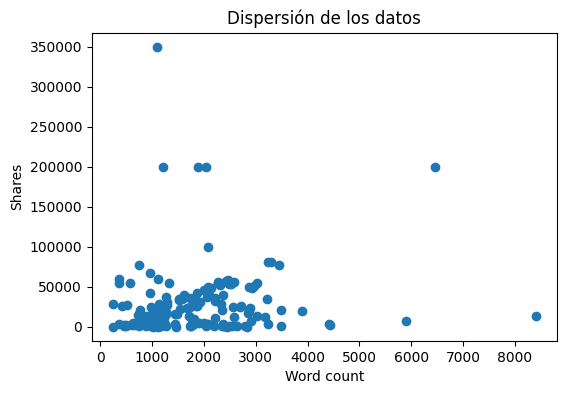

In [14]:
# 7) Gráfica de dispersión (primer atributo numérico vs shares)
plt.figure(figsize=(6,4))
primer_atributo = X.columns[0]  # obtenemos el nombre de la primera columna numérica
plt.scatter(X[primer_atributo], y)
plt.title("Dispersión de los datos")
plt.xlabel(f"{primer_atributo}")
plt.ylabel("Shares")
plt.show()


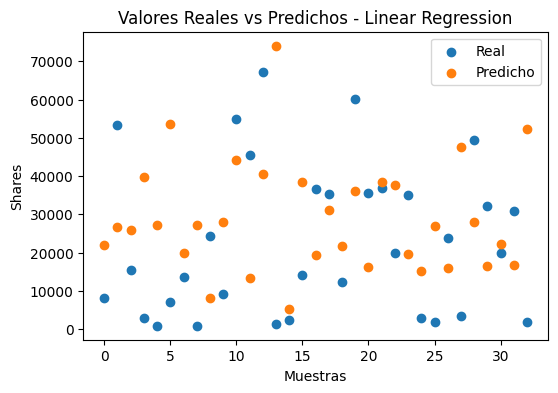

In [15]:
# 8) Gráfica de valores reales vs predichos
plt.figure(figsize=(6,4))
plt.scatter(range(len(y_test)), y_test, label="Real")
plt.scatter(range(len(y_pred_opt)), y_pred_opt, label="Predicho")
plt.title("Valores Reales vs Predichos - Linear Regression")
plt.xlabel("Muestras")
plt.ylabel("Shares")
plt.legend()
plt.show()